# Encoding Numerical Data
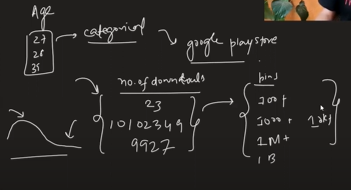

We can create bins for 100+downloads, 1000+downloads because normal numercial data is helping much.

some apps have many downloads while a large amount of apps have few downloads

Two Techniques to Encode Numerical Data: 
1. Discretization or Binning
2. Binarization

#### Discritization 

It is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretization is also called binning, where bin is an alternative name for interval.

Why Discretization:

1. to handle outliers
2. to improve the values spread


# types of discritization

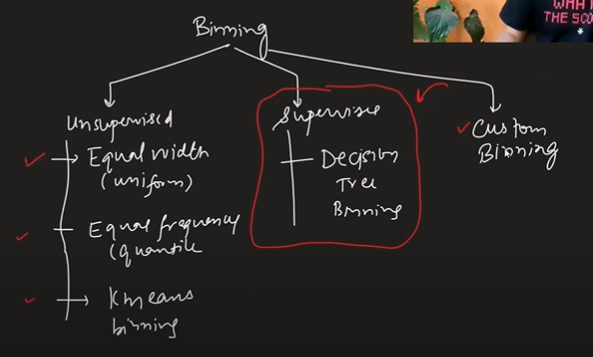

1. Equal Width/Uniform Binning:


In [ ]:
# 1. Equal Width/Uniform Binning: (max-min)/number of bins
    